# Modelos Econométricos (经济计量模型)
Neste notebook tem os seguintes modelos estatísticos: （本笔记有一下统计模型）
- AR
- ARIMA
- SARIMA

## **Prepare Environment**

<br/>


### Imports

In [9]:
# Data analysis and data wrangling 数据整理
import numpy as np
import pandas as pd

# Metrics 度量
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# statsmodels
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

# autoarima
import pmdarima as pm

# Other
from IPython.display import Image
import warnings
import pprint
import datetime
import itertools
import os

<br/>

### Prepare Principal Directory

In [10]:
def path_to_work(end_directory: str='notebooks'):
    curr_dir = os.path.dirname(os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return f'Change directory to: {curr_dir}'
    
    return f'Current working directory: {curr_dir}'

In [11]:
path_to_work('notebooks')

'Change directory to: /Users/kyoula/Documents/M2/code/2/forecast-of-time-series-with-stock-data-master/notebooks'

<br/>

### Set Config (设置配置)

In [12]:
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500, 
    'figure.autolayout': True, 
    'figure.figsize': [17, 12], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 10, 
    'lines.linewidth': 1.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 15,
    'xtick.labelsize': 15, 
    'ytick.labelsize': 15}

sns.set(context='notebook',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True, 
        rc=rc)

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

In [13]:
plt.style.use('seaborn')  # fivethirtyeight
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

<br/>

### Load Data

In [14]:
%%time

df_vale3 = pd.read_csv('data/cleansing/df_vale3_cleansing.csv',
                              encoding='utf8',
                              delimiter=',',
                              parse_dates=True,
                              index_col=0,
                              verbose=True)

Tokenization took: 2.46 ms
Type conversion took: 3.89 ms
Parser memory cleanup took: 0.00 ms
CPU times: user 11.9 ms, sys: 13.5 ms, total: 25.5 ms
Wall time: 34.2 ms


In [15]:
df_vale3.head()

,preco,residuos,tendencia,sazonalidade,diff_1,diff_2,diff_3,diff_4,diff_5
data,,,,,,,,,
2010-07-12,40.00,1.00,41.83,1.00,-0.60,-0.46,0.49,0.98,0.42
2010-07-13,40.07,1.04,41.91,1.00,0.07,-0.53,-0.39,0.56,1.05
2010-07-14,40.08,1.03,41.98,1.00,0.01,0.08,-0.52,-0.38,0.57
2010-07-15,39.76,1.04,42.05,1.00,-0.32,-0.31,-0.24,-0.84,-0.70
2010-07-16,38.88,1.03,42.12,1.00,-0.88,-1.20,-1.19,-1.12,-1.72


---

## **Split Data**

In [16]:
size_train = 2132
size_test = 313
print(size_train)
print(size_test)

df_train = df_vale3['preco'].iloc[:size_train]
df_test = df_vale3['preco'].iloc[size_train:]

2132
313


In [17]:
df_train.tail()

data
2019-02-15   45.88
2019-02-18   45.25
2019-02-19   45.49
2019-02-20   45.80
2019-02-21   45.38
Name: preco, dtype: float64

Text(0.5, 1.0, 'Tamaho Treinamento = 2132')

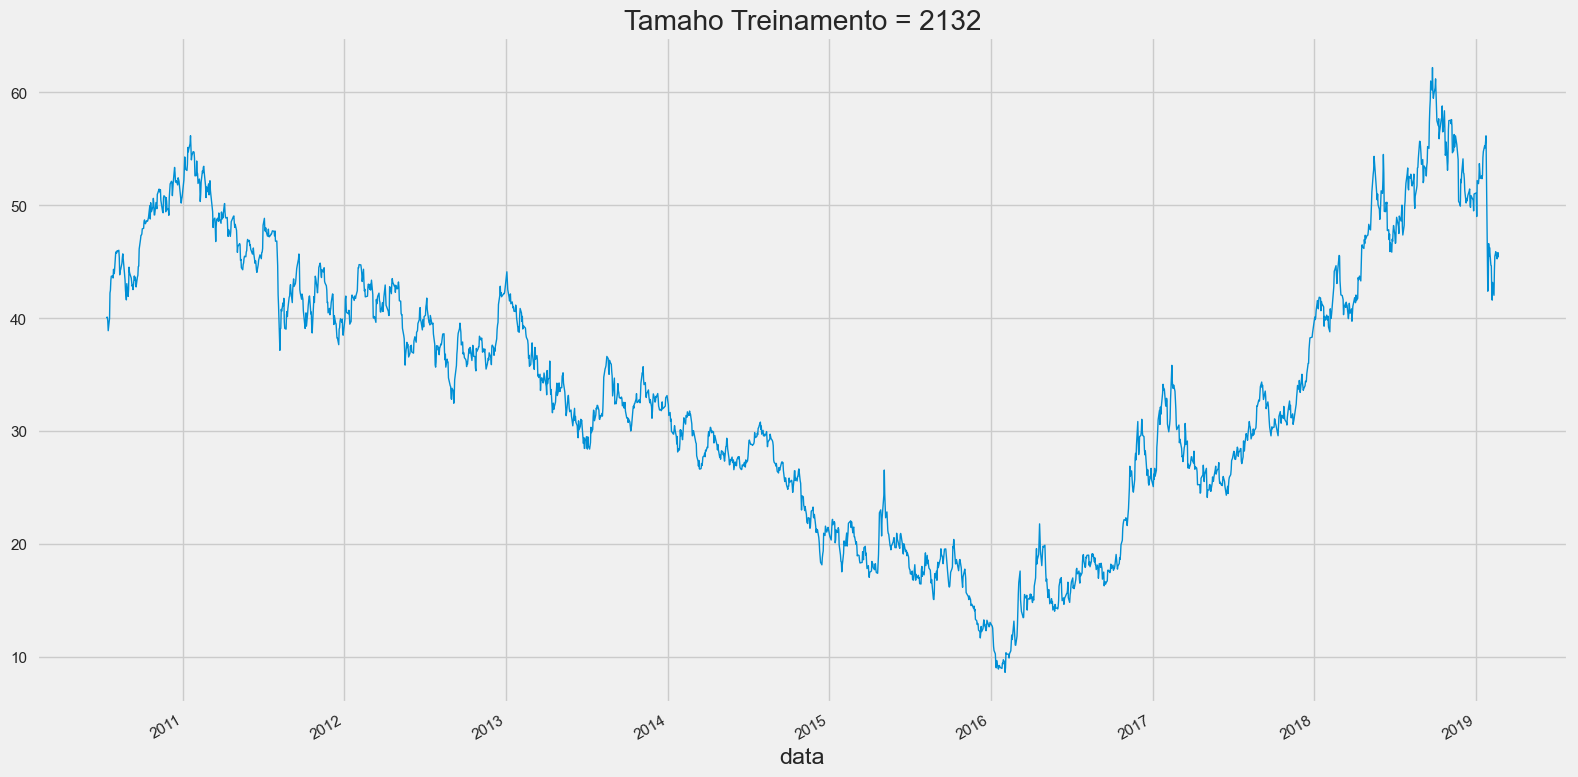

In [18]:
df_train.plot(linewidth=1)
plt.grid(True)
plt.title(f'Tamaho Treinamento = {len(df_train)}')

In [19]:
df_test.head()

data
2019-02-22   46.99
2019-02-25   47.12
2019-02-26   47.20
2019-02-27   46.83
2019-02-28   47.10
Name: preco, dtype: float64

Text(0.5, 1.0, 'Tamaho Teste = 313')

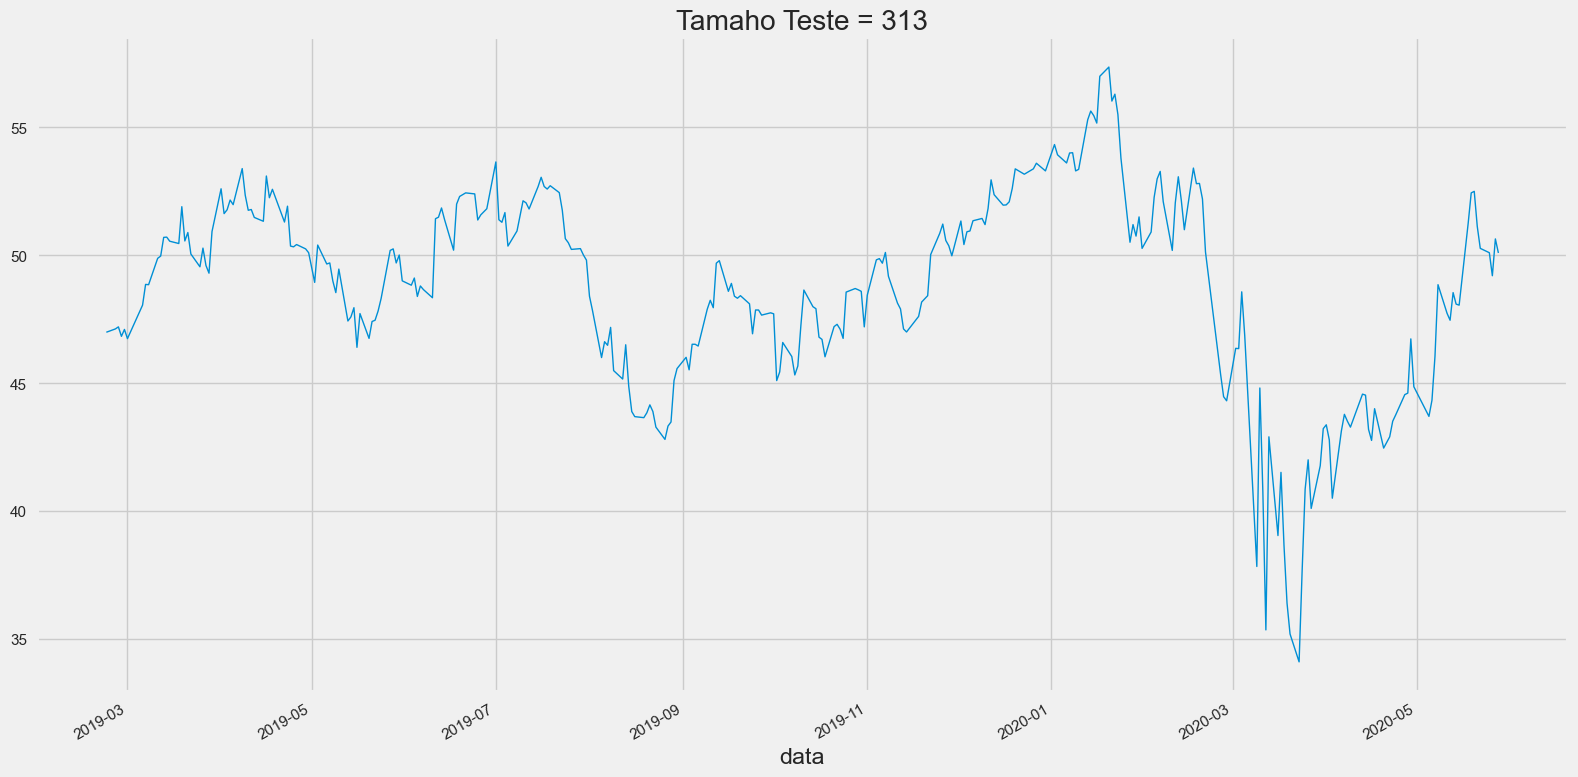

In [20]:
df_test.plot(linewidth=1)
plt.grid(True)
plt.title(f'Tamaho Teste = {len(df_test)}')

### Manipulação do índice （索引操作）

In [21]:
df_train.index

DatetimeIndex(['2010-07-12', '2010-07-13', '2010-07-14', '2010-07-15',
               '2010-07-16', '2010-07-19', '2010-07-20', '2010-07-21',
               '2010-07-22', '2010-07-23',
               ...
               '2019-02-08', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-18', '2019-02-19',
               '2019-02-20', '2019-02-21'],
              dtype='datetime64[ns]', name='data', length=2132, freq=None)

In [22]:
df_test.index

DatetimeIndex(['2019-02-22', '2019-02-25', '2019-02-26', '2019-02-27',
               '2019-02-28', '2019-03-01', '2019-03-06', '2019-03-07',
               '2019-03-08', '2019-03-11',
               ...
               '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28'],
              dtype='datetime64[ns]', name='data', length=313, freq=None)

In [23]:
df_train.reset_index(drop=True, inplace=True)
df_train.index

RangeIndex(start=0, stop=2132, step=1)

In [24]:
df_test.reset_index(drop=True, inplace=True)
df_test.index

RangeIndex(start=0, stop=313, step=1)

In [25]:
df_train.index = pd.RangeIndex(start=0, stop=len(df_train), step=1)
df_train.index

RangeIndex(start=0, stop=2132, step=1)

In [26]:
df_test.index = pd.RangeIndex(start=2132, stop=len(df_vale3), step=1)
df_test.index

RangeIndex(start=2132, stop=2445, step=1)

---

---

## **Evaluation**

In [27]:
dict_results = {}

<br/>

### Display Results

In [28]:
def show_result_model(df_train, df_test, y_forecast, model_name):
    future_forecast = pd.DataFrame(y_forecast,
                                   index=df_test.index,
                                   columns=['previsao'])
    #mape = mean_absolute_percentage_error(df_test, y_forecast)
    mape = mean_absolute_percentage_error(df_test, y_forecast)*100
    
    mse = mean_squared_error(df_test, y_forecast, squared=True)
    dict_results[model_name] = [mape, mse]
    
    pd.concat([df_test, future_forecast], axis=1).plot()

    plt.legend()
    plt.grid(True)
    plt.xlabel("Tempo (dias)", fontsize=20)
    plt.ylabel("Preço (R$)", fontsize=20)
    plt.title(f'MAPE = {mape:.2f} % | MSE = {mse:.2f}', fontsize=25)

<br/>

### Busca dos Melhores Parâmetros （搜索最佳参数） 

#### Grid Search （网格搜索）

In [31]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0, 3)

# Generate all different combinations of p, q and q triplets
list_pdq = list(itertools.product(p, d, q))
print(f'All different combinations of p, q and q:\n {list_pdq}')

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print(f'\n\nAll different combinations of seasonal p, q and q:\n {seasonal_pdq}')

All different combinations of p, q and q:
 [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


All different combinations of seasonal p, q and q:
 [(0, 0, 0, 12), (0, 0, 1, 12), (0, 0, 2, 12), (0, 1, 0, 12), (0, 1, 1, 12), (0, 1, 2, 12), (0, 2, 0, 12), (0, 2, 1, 12), (0, 2, 2, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 0, 2, 12), (1, 1, 0, 12), (1, 1, 1, 12), (1, 1, 2, 12), (1, 2, 0, 12), (1, 2, 1, 12), (1, 2, 2, 12), (2, 0, 0, 12), (2, 0, 1, 12), (2, 0, 2, 12), (2, 1, 0, 12), (2, 1, 1, 12), (2, 1, 2, 12), (2, 2, 0, 12), (2, 2, 1, 12), (2, 2, 2, 12)]


In [30]:
def search_best_params_arima_model(df_train: 'Dataframe', pdq: list) -> list:
    best_model = 99999
    best_params = (0, 0, 0)
    param = ()
    
    for param in pdq:
        try:
            arima_model = ARIMA(df_train, order=param)
            results = arima_model.fit()
            print(f'pdq = {param} | AIC = {results.aic}')
            
            if results.aic < best_model:
                best_model = results.aic
                best_params = param
        except: 
            continue
    
    print(f'best ARIMA: {best_params} | AIC:{best_model}')
    return [best_params, best_model]

In [32]:
def search_best_params_sarima_model(df_train, trend, pdq):  
    best_model = 99999
    best_param_seasonal = ()
    param = ()
    param_seasonal = ()
    
    for param_seasonal in seasonal_pdq:
        try:
            sarima_model = SARIMAX(df_train,
                                   order=pdq,
                                   seasonal_order=param_seasonal,
                                   trend=trend,          
                                   enforce_stationarity=True,
                                   enforce_invertibility=False)
            results = sarima_model.fit()
            print(f'pdq = {pdq} | param_seasonal = {param_seasonal} | AIC = {results.aic}')

            if results.aic < best_model:
                best_model = results.aic
                best_param_seasonal = param_seasonal
        except: 
            continue
    
    print(f'\n\nBest SARIMA: {pdq}x{param_seasonal}12 | AIC:{best_model}')
    return [best_param_seasonal, best_model]

---

## **Modeling**

<br/>

### **Build Model**

#### **Modelos Estatísticos** 统计模型

#### **AR**
- A ST não é estacionária 
- Não há tendência, (trend='n')
- Não aá sazonalidade, (seasonal=False) no período de 30 dias （无季节性 30天内）

In [33]:
ar_model = AutoReg(df_train,
                   lags=313,
                   trend='n',
                   seasonal=False,
                   period=len(df_test))
ar_fit = ar_model.fit()

In [34]:
# forecast
y_ar_forecast = ar_fit.predict(start=(df_test.index[0]), end=df_test.index[-1])

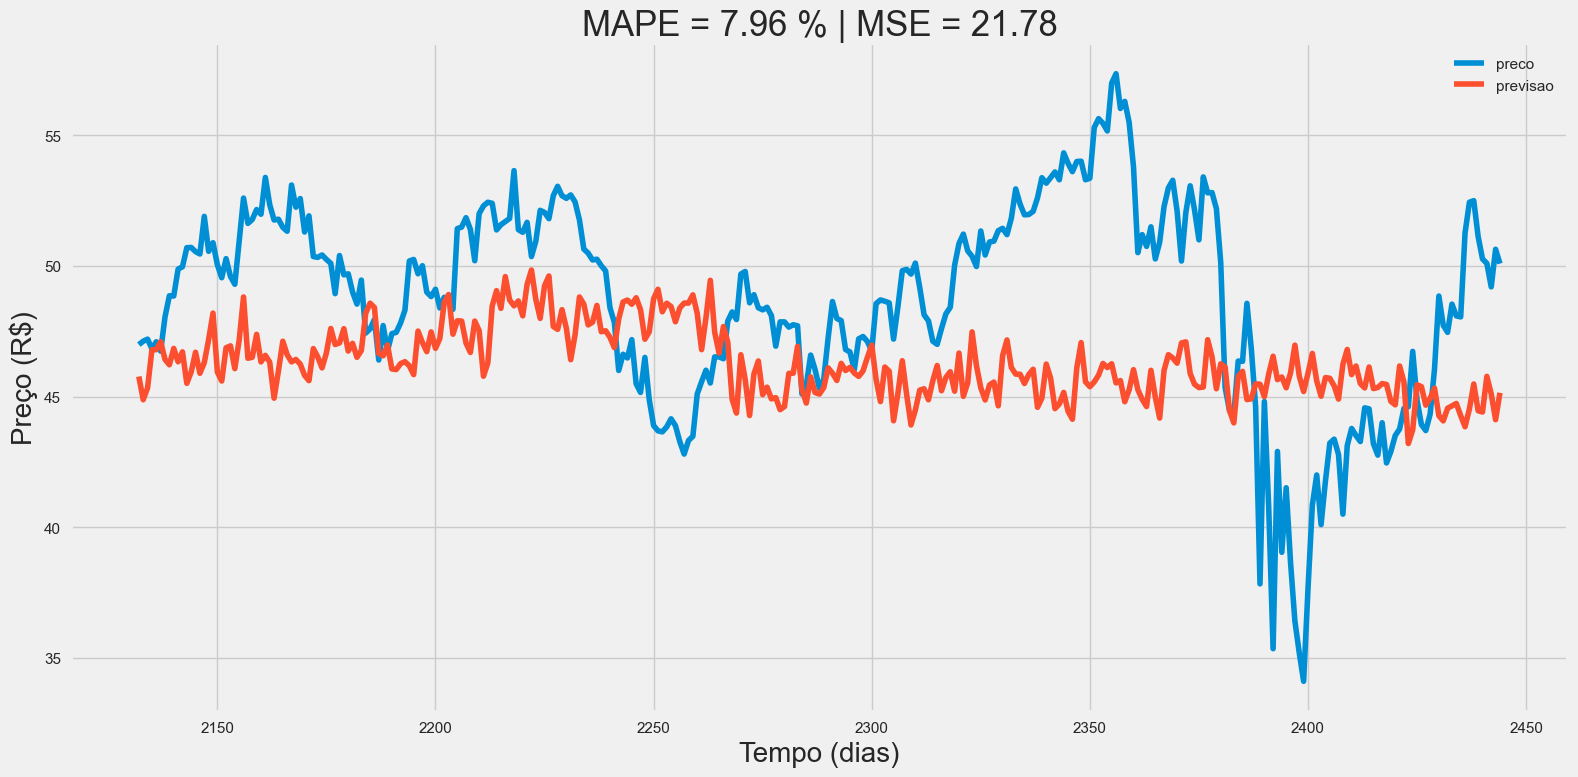

In [35]:
show_result_model(df_train=df_train,
                  df_test=df_test, 
                  y_forecast=y_ar_forecast,
                  model_name='ar_model')

#### zoom

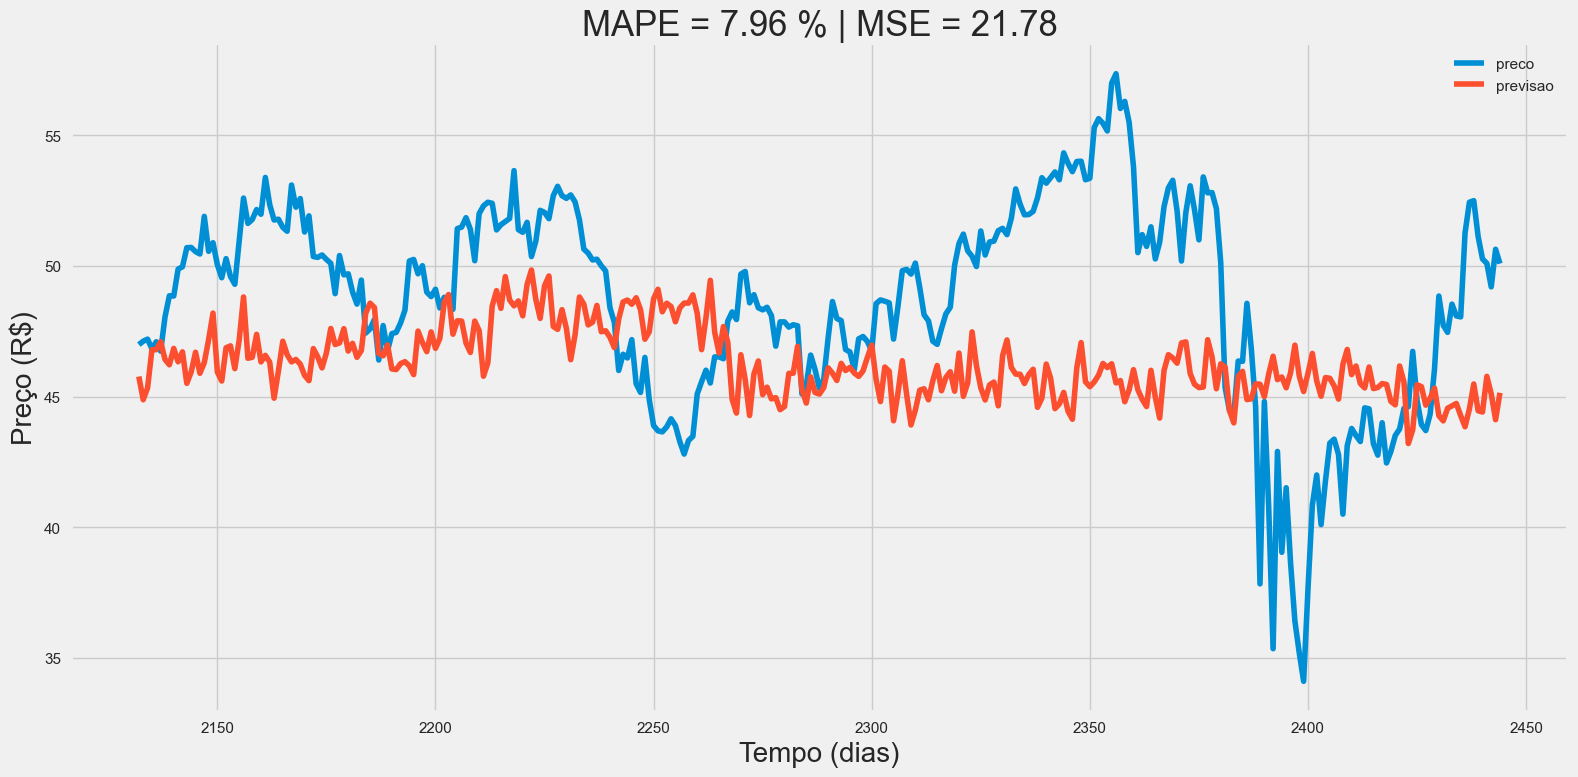

In [36]:
show_result_model(df_train=df_test,
                  df_test=df_test, 
                  y_forecast=y_ar_forecast,
                  model_name='ar_model')

<br/>

#### **ARIMA**

#### Librarie: `pmdarima`
- Tips: https://alkaline-ml.com/pmdarima/tips_and_tricks.html

In [37]:
%%time

list_order_arima = search_best_params_arima_model(df_train=df_train,
                                                  pdq=list_pdq)
print(list_order_arima)

best ARIMA: (0, 0, 0) | AIC:99999
[(0, 0, 0), 99999]
CPU times: user 560 µs, sys: 250 µs, total: 810 µs
Wall time: 781 µs


In [38]:
%%time

autoarima_model = pm.auto_arima(df_train,
                                stepwise=True,
                                suppress_warnings=True,
                                error_action="ignore",
                                information_criterion='aic',
                                start_p=2,
                                start_d=1,
                                start_q=2,
                                lags=313,
                                seasonal=False,
                                trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5189.626, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5202.401, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5202.744, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5202.427, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5200.421, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5191.786, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5192.782, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5191.420, Time=0.81 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5191.381, Time=0.97 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5195.793, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5189.941, Time=0.79 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5194.800, Time=0.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5193.582, Time=0.86 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5187.657, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [39]:
print(autoarima_model.order)
print(autoarima_model.aic())

(2, 1, 2)
5187.656935166745


In [40]:
# fit
autoarima_model_fit = autoarima_model.fit(y=df_train)
autoarima_model_fit

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [41]:
# forecast
y_forecast = autoarima_model_fit.predict(n_periods=len(df_test[:313]))
len(y_forecast)

313

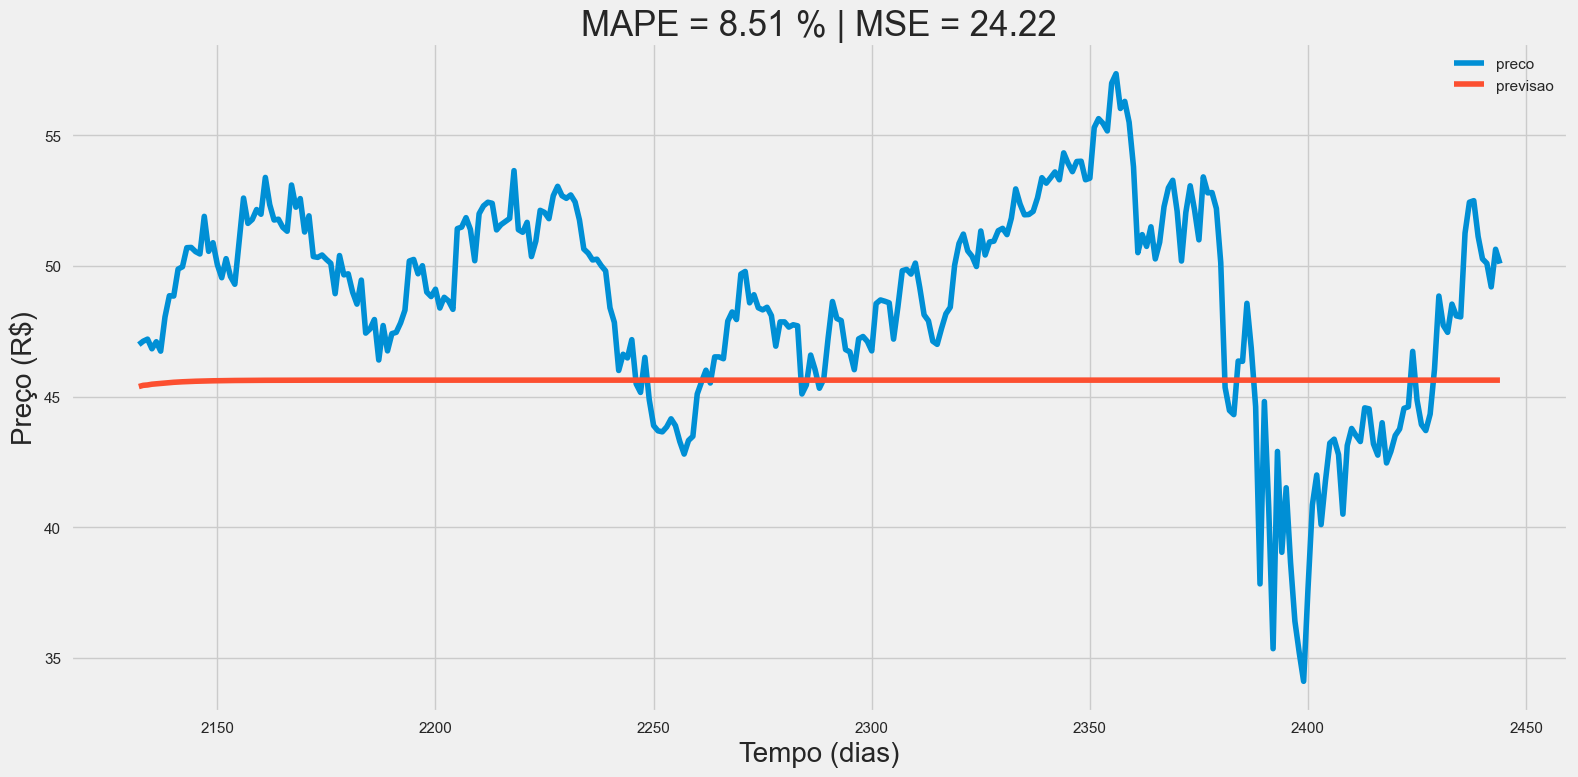

In [42]:
show_result_model(df_train=df_train,
                  df_test=df_test,
                  y_forecast=y_forecast,
                  model_name='arima_model')

#### Zoom

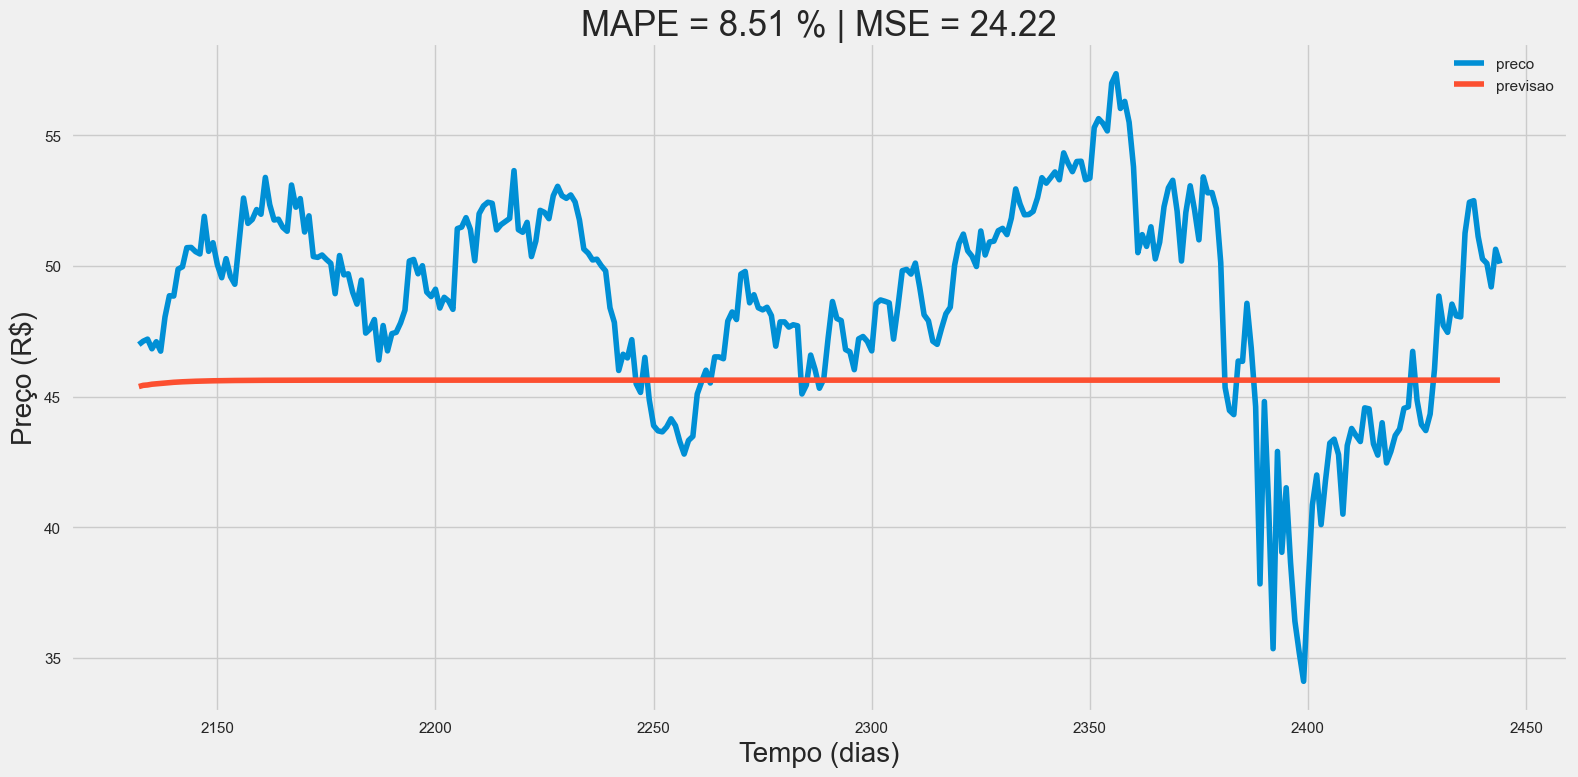

In [43]:
show_result_model(df_train=df_test,
                  df_test=df_test, 
                  y_forecast=y_forecast,
                  model_name='arima_model')

<br/>

#### **SARIMA**

In [44]:
%%time

list_order_seasonal_aic = search_best_params_sarima_model(df_train=df_train,
                                                          trend='t',
                                                          pdq=(2, 1, 2))
print(list_order_seasonal_aic)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21483D+00    |proj g|=  2.69588D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     43      2     0     0   8.074D-03   1.215D+00
  F =   1.2147144000632670     

ABNORMAL_TERMINATION_IN_LNSRCH                              
pdq = (2, 1, 2) | param_seasonal = (0, 0, 0, 12) | AIC = 5191.542201869771


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21438D+00    |proj g|=  2.94332D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     15      1     0     0   9.500D-03   1.214D+00
  F =   1.2142515441489972     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
pdq = (2, 1, 2) | param_seasonal = (0, 0, 1, 12) | AIC = 5191.568584251324
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21378D+00    |proj g|=  3.21228D+02


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     19      1     0     0   1.318D-02   1.214D+00
  F =   1.2136546195329869     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
pdq = (2, 1, 2) | param_seasonal = (0, 0, 2, 12) | AIC = 5191.023297688656


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56589D+00    |proj g|=  4.32040D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     46      2     0     0   3.743D+05   1.561D+00
  F =   1.5612215958420332     

ABNORMAL_TERMINATION_IN_LNSRCH                              
pdq = (2, 1, 2) | param_seasonal = (0, 1, 0, 12) | AIC = 6669.04888467043



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49609D+00    |proj g|=  8.70151D+06


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     46      2     0     0   7.540D+06   1.408D+00
  F =   1.4081728181277073     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


pdq = (2, 1, 2) | param_seasonal = (0, 1, 1, 12) | AIC = 6018.448896496544
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36029D+00    |proj g|=  6.06637D+07


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     46      2     0     0   5.258D+07   1.809D+00
  F =   1.8091974097279064     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


pdq = (2, 1, 2) | param_seasonal = (0, 1, 2, 12) | AIC = 7730.417755079793


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.08488D+00    |proj g|=  3.86207D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     15      1     0     0   2.750D-01   2.085D+00
  F =   2.0848759747990355     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
pdq = (2, 1, 2) | param_seasonal = (0, 2, 0, 12) | AIC = 8901.911156543087
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.92672D+00    |proj g|=  9.45914D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     43      2     0     0   3.113D+00   1.926D+00
  F =   1.9257349698007407     

ABNORMAL_TERMINATION_IN_LNSRCH                              
pdq = (2, 1, 2) | param_seasonal = (0, 2, 1, 12) | AIC = 8225.333911230358


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86555D+00    |proj g|=  5.06532D+04

At iterate    5    f=  1.81089D+00    |proj g|=  1.71211D+01

At iterate   10    f=  1.80969D+00    |proj g|=  2.55081D+02

At iterate   15    f=  1.79989D+00    |proj g|=  1.96343D+03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     18     35      1     0     0   1.974D+03   1.795D+00
  F =   1.7949670276888190     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
pdq = (2, 1, 2) | param_seasonal = (0, 2, 2, 12) | AIC = 7669.739406065124
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21432D+00    |proj g|=  2.67240D+02


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     43      2     0     0   8.000D-03   1.214D+00
  F =   1.2142192168977182     

ABNORMAL_TERMINATION_IN_LNSRCH                              
pdq = (2, 1, 2) | param_seasonal = (1, 0, 0, 12) | AIC = 5191.430740851871


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21529D+00    |proj g|=  9.51053D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     17      1     0     0   2.848D-02   1.214D+00
  F =   1.2143618069453479     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
pdq = (2, 1, 2) | param_seasonal = (1, 0, 1, 12) | AIC = 5194.038744814963



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21430D+00    |proj g|=  6.20437D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     18      1     0     0   1.856D-02   1.214D+00
  F =   1.2138371926752174     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


pdq = (2, 1, 2) | param_seasonal = (1, 0, 2, 12) | AIC = 5193.801789567127
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43854D+00    |proj g|=  4.31510D+05


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     46      2     0     0   3.738D+05   1.434D+00
  F =   1.4335968248873014     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


pdq = (2, 1, 2) | param_seasonal = (1, 1, 0, 12) | AIC = 6126.856861319453


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46630D+00    |proj g|=  6.87278D+06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     46      2     0     0   5.955D+06   1.396D+00
  F =   1.3962272921298182     

ABNORMAL_TERMINATION_IN_LNSRCH                              
pdq = (2, 1, 2) | param_seasonal = (1, 1, 1, 12) | AIC = 5969.513173641545
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55953D+00    |proj g|=  1.43134D+07


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     46      2     0     0   1.241D+07   1.449D+00
  F =   1.4486455276755179     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


pdq = (2, 1, 2) | param_seasonal = (1, 1, 2, 12) | AIC = 6195.024530008408
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.87054D+00    |proj g|=  4.59069D+01


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     20      1     0     0   2.187D-01   1.870D+00
  F =   1.8704901872381843     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
pdq = (2, 1, 2) | param_seasonal = (1, 2, 0, 12) | AIC = 7989.770158383618
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.75336D+00    |proj g|=  4.23899D+03


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     38      2     0     0   3.451D-01   1.749D+00
  F =   1.7487250822844467     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


pdq = (2, 1, 2) | param_seasonal = (1, 2, 1, 12) | AIC = 7472.563750860881
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90906D+00    |proj g|=  5.50383D+02


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     15      1     0     0   3.706D+00   1.908D+00
  F =   1.9084404570244089     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
pdq = (2, 1, 2) | param_seasonal = (1, 2, 2, 12) | AIC = 8155.59010875208
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21365D+00    |proj g|=  2.62160D+02


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     15      1     0     0   7.851D-03   1.214D+00
  F =   1.2135733165509626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
pdq = (2, 1, 2) | param_seasonal = (2, 0, 0, 12) | AIC = 5190.676621773305
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21477D+00    |proj g|=  8.47446D+02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     18      1     0     0   2.537D-02   1.214D+00
  F =   1.2140210608397772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


pdq = (2, 1, 2) | param_seasonal = (2, 0, 1, 12) | AIC = 5194.58580342081


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21423D+00    |proj g|=  5.97814D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      2     43      2     0     0   1.788D-02   1.214D+00
  F =   1.2137991882729759     

ABNORMAL_TERMINATION_IN_LNSRCH                              
pdq = (2, 1, 2) | param_seasonal = (2, 0, 2, 12) | AIC = 5195.63973879597
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39939D+00    |proj g|=  4.29858D+05


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     46      2     0     0   3.725D+05   1.395D+00
  F =   1.3949069675221619     

ABNORMAL_TERMINATION_IN_LNSRCH                              
pdq = (2, 1, 2) | param_seasonal = (2, 1, 0, 12) | AIC = 5963.883309514498


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44378D+00    |proj g|=  5.52793D+06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     46      2     0     0   4.790D+06   1.387D+00
  F =   1.3872681520766679     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


pdq = (2, 1, 2) | param_seasonal = (2, 1, 1, 12) | AIC = 5933.311400454912
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57757D+00    |proj g|=  1.54559D+07


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      2     46      2     0     0   1.340D+07   1.458D+00
  F =   1.4582230625766848     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


pdq = (2, 1, 2) | param_seasonal = (2, 1, 2, 12) | AIC = 6237.863138826984


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80505D+00    |proj g|=  4.82354D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     43      2     0     0   2.858D-01   1.805D+00
  F =   1.8049894811304061     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


pdq = (2, 1, 2) | param_seasonal = (2, 2, 0, 12) | AIC = 7712.475147540052


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74831D+00    |proj g|=  8.21896D+02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     21      1     0     0   6.139D-01   1.747D+00
  F =   1.7473955286544529     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
pdq = (2, 1, 2) | param_seasonal = (2, 2, 1, 12) | AIC = 7468.894534182587
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.82453D+00    |proj g|=  1.12003D+03


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      2     39      2     0     0   4.385D+00   1.823D+00
  F =   1.8232464980764467     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


pdq = (2, 1, 2) | param_seasonal = (2, 2, 2, 12) | AIC = 7794.323067797969


Best SARIMA: (2, 1, 2)x(2, 2, 2, 12)12 | AIC:5190.676621773305
[(2, 0, 0, 12), 5190.676621773305]
CPU times: user 22min 35s, sys: 14min 10s, total: 36min 45s
Wall time: 5min 2s


In [45]:
list_order_seasonal_aic

[(2, 0, 0, 12), 5190.676621773305]

In [46]:
sarima_model = SARIMAX(df_train,
                       order=(2, 1, 2),
                       seasonal_order=list_order_seasonal_aic[0],
                       trend='c',          
                       enforce_stationarity=False,
                       enforce_invertibility=False)

In [47]:
# fit
sarima_fit = sarima_model.fit()
print(sarima_fit)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19948D+00    |proj g|=  2.42592D-02


 This problem is unconstrained.



At iterate    5    f=  1.19945D+00    |proj g|=  4.39885D-04

At iterate   10    f=  1.19944D+00    |proj g|=  2.59872D-03

At iterate   15    f=  1.19943D+00    |proj g|=  8.46048D-05

At iterate   20    f=  1.19943D+00    |proj g|=  5.15136D-04

At iterate   25    f=  1.19943D+00    |proj g|=  2.07794D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     29      1     0     0   6.424D-05   1.199D+00
  F =   1.1994297064755945     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [48]:
# forecast
y_forecast_sarima = sarima_fit.predict(start=df_test.index[0], end=df_test.index[-1]).to_numpy()
len(y_forecast_sarima)

313

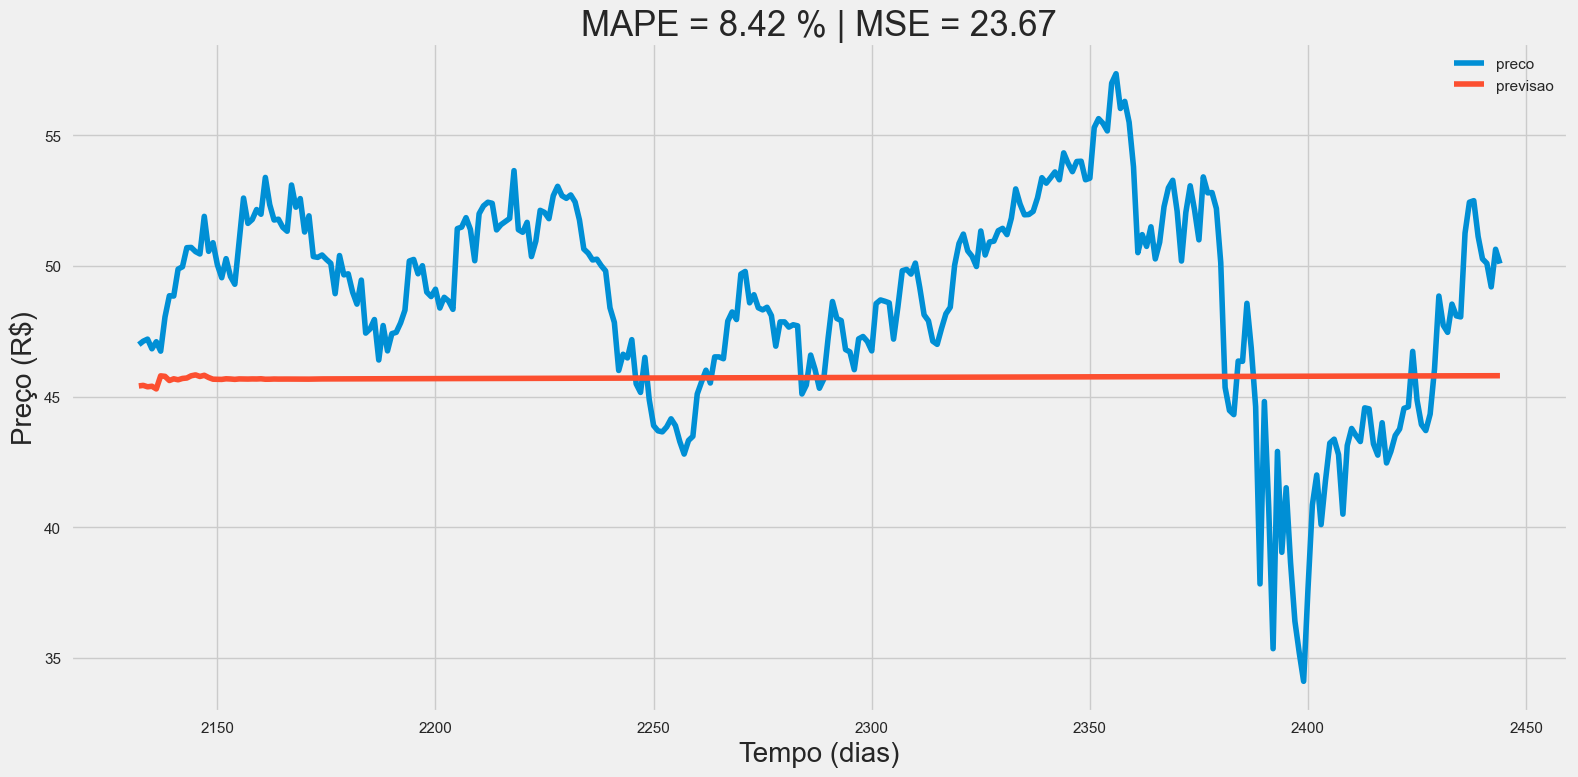

In [49]:
show_result_model(df_train=df_test,
                  df_test=df_test,
                  y_forecast=y_forecast_sarima,
                  model_name='sarima_model')

---

## **Results**

In [50]:
dict_results

{'ar_model': [7.9558138721714995, 21.780365011724136],
 'arima_model': [8.514593898189766, 24.220585388150514],
 'sarima_model': [8.42369005353625, 23.667374242092222]}

---